In [1]:
import gplearn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
# import dataset (cleaned)
df = pd.read_csv(r'cleaned_data_simplified.csv', index_col=0)

In [3]:
df.columns

Index(['Duration', 'Distance', 'Pickup_longitude', 'Pickup_latitude',
       'Haversine', 'Pmonth', 'Pickup_day', 'Pickup_hour', 'Pickup_minute',
       'Pickup_weekday', 'Dropoff_hour', 'Dropoff_minute', 'Temp', 'Precip',
       'Wind', 'Humid', 'Solar', 'Snow', 'Dust'],
      dtype='object')

In [4]:
x = df.drop('Duration', axis=1)

In [5]:
y = df.loc[:,'Duration'].to_frame()
type(y)
print(y)

         Duration
0               3
1              24
2               8
3               8
4               4
...           ...
9830302        39
9830304        70
9830305        52
9830306        67
9830307        58

[8769371 rows x 1 columns]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

In [7]:
from gplearn.genetic import SymbolicRegressor
import pickle

In [8]:
df = None
x = None
y = None


In [9]:
gp = SymbolicRegressor(population_size=100, stopping_criteria=0.01, verbose=1, random_state=10,
                       tournament_size=10, p_crossover=0.6,p_hoist_mutation=0.00,
                       p_point_mutation=0.2,p_subtree_mutation=0.2, n_jobs=5, init_method='grow',
                       function_set=('add','sub','mul','div'))

In [10]:
gp.set_params(warm_start = False, generations=20, random_state=5)

SymbolicRegressor(init_method='grow', n_jobs=5, p_crossover=0.6,
                  p_hoist_mutation=0.0, p_point_mutation=0.2,
                  p_subtree_mutation=0.2, population_size=100, random_state=5,
                  stopping_criteria=0.01, tournament_size=10, verbose=1)

In [11]:
gp.fit(X=X_train, y=np.ravel(y_train))

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0     4.80       1.2266e+06        3          14.4839              N/A      2.73m
   1     6.20           80.323        3          14.4839              N/A      2.25m
   2     5.46          56.5205        5          13.9736              N/A      2.13m
   3     3.22          49.0063        5          13.9736              N/A      1.56m
   4     4.20          650.681        7           13.707              N/A      1.56m
   5     5.78          16.4873        7           13.707              N/A      1.64m
   6     6.22          81.9309        7          13.4643              N/A      1.47m
   7     6.60          114.614        9          12.8091              N/A      1.36m
   8     6.96          149.863       11          12.5196              N/A  

SymbolicRegressor(init_method='grow', n_jobs=5, p_crossover=0.6,
                  p_hoist_mutation=0.0, p_point_mutation=0.2,
                  p_subtree_mutation=0.2, population_size=100, random_state=5,
                  stopping_criteria=0.01, tournament_size=10, verbose=1)

In [12]:
# gp.set_params(warm_start = True, generations=20, n_jobs=4)

In [13]:
gp.fit(X=X_train, y=np.ravel(y_train))

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0     4.80       1.2266e+06        3          14.4839              N/A      2.11m
   1     6.20           80.323        3          14.4839              N/A      2.20m
   2     5.46          56.5205        5          13.9736              N/A      1.97m
   3     3.22          49.0063        5          13.9736              N/A      1.55m
   4     4.20          650.681        7           13.707              N/A      1.54m
   5     5.78          16.4873        7           13.707              N/A      1.55m
   6     6.22          81.9309        7          13.4643              N/A      1.45m
   7     6.60          114.614        9          12.8091              N/A      1.35m
   8     6.96          149.863       11          12.5196              N/A  

SymbolicRegressor(init_method='grow', n_jobs=5, p_crossover=0.6,
                  p_hoist_mutation=0.0, p_point_mutation=0.2,
                  p_subtree_mutation=0.2, population_size=100, random_state=5,
                  stopping_criteria=0.01, tournament_size=10, verbose=1)

In [14]:
import pickle
with open('report_model_run2.pkl', 'wb') as f:
    pickle.dump(gp, f)

In [15]:
# load model
# import pickle
# with open('report_model.pkl', 'rb') as f:
#    gp = pickle.load(f)

In [16]:
print(gp._program)

add(X3, add(X3, add(X3, add(X3, add(X3, X4)))))


In [17]:
import graphviz

In [18]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
import math

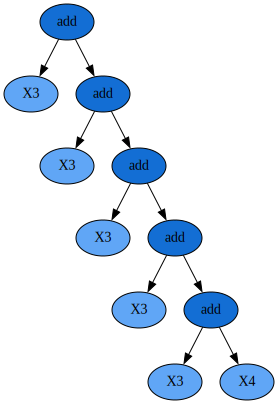

In [19]:
dot_data = gp._program.export_graphviz()
graph = graphviz.Source(dot_data)
graph

In [27]:
import sympy
a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r = sympy.symbols(
    'a b c d e f g h i j k l m n o p q r'
)
converter = {
    'sub': lambda x, y : x - y,
    'div': lambda x, y : x/y,
    'mul': lambda x, y : x*y,
    'add': lambda x, y : x + y,
    'neg': lambda x    : -x,
    'pow': lambda x, y : x**y,
    # 'sqrt': lambda x   : math.sqrt(x)
}

expression = sympy.sympify(str(gp._program), locals=converter)

f = sympy.utilities.lambdify([a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r], expression)



In [28]:
expression

5*X3 + X4

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error

In [30]:
y_train

,Duration
3087543,21
8999953,7
5861335,40
7056870,22
8656450,5
...,...
7748708,4
4072385,9
5900258,56
9057562,8


In [31]:
X_train.columns

Index(['Distance', 'Pickup_longitude', 'Pickup_latitude', 'Haversine',
       'Pmonth', 'Pickup_day', 'Pickup_hour', 'Pickup_minute',
       'Pickup_weekday', 'Dropoff_hour', 'Dropoff_minute', 'Temp', 'Precip',
       'Wind', 'Humid', 'Solar', 'Snow', 'Dust'],
      dtype='object')

In [32]:
expression

5*X3 + X4

In [33]:
f(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18)

NameError: name 'X3' is not defined

In [41]:
# using training data
y_true = y_train['Duration'].to_list()

def get_prediction(df : pd.DataFrame, gp):
    return gp.predict(df)

y_pred = get_prediction(X_train, gp)

In [42]:
y_pred

array([13.69957255, 13.7727741 , 11.2191372 , ..., 35.7784358 ,
       15.01337682, 14.06042301])

In [43]:
mae = mean_absolute_error(y_true, y_pred)

In [44]:
mse = mean_squared_error(y_true, y_pred)

In [45]:
import math
rmse = math.sqrt(mse)

In [49]:
r2 = gp.score(X_train, y_train)
r2

-0.029792220047508033

In [50]:
medae = median_absolute_error(y_true, y_pred)

In [52]:
print("MAE: " + str(mae))
print("RMSE: " + str(rmse))
print("R2: " + str(r2))
print("MedAE: " + str(medae))

MAE: 12.519569337513696
RMSE: 20.528541367652174
R2: -0.029792220047508033
MedAE: 6.6723390348639455


**Putting it all together into one final function that'll generate all my report data for me!**

In [7]:
import gplearn
from gplearn.genetic import SymbolicRegressor
import pandas as pd
import numpy as np
import pickle
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error

def save_results(run_number, mae, rmse, medae, r2, train):
    f = open("gplearn_results.txt", "a")
    f.write(
        "Run number: " + str(run_number) + "(data: " + train + ")\n" + 
        "MAE: " + str(mae) + '\n' +
        "RMSE: " + str(rmse) + '\n' +
        "MedAE: " + str(medae) + '\n' +
        "R2: " + str(r2) + '\n\n')
    f.close()

def generate_and_save(X_train : pd.DataFrame, y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame, start_state=1, end_state=11):
    for i in range(start_state, end_state):
        rgp = SymbolicRegressor(init_depth=(5,10), population_size=100, stopping_criteria=0.01, verbose=1, random_state=i,
        tournament_size=10, p_crossover=0.6,p_hoist_mutation=0.00,
        p_point_mutation=0.2,p_subtree_mutation=0.2, n_jobs=5, init_method='half_and_half',
        function_set=('add','sub','mul','div'))

        rgp.fit(X_train, np.ravel(y_train))

        filename = 'report_model_gplearn_run' + str(i) + '.pkl'
        with open(filename, 'wb') as f:
            pickle.dump(rgp, f)

        y_true_train = y_train['Duration'].to_list()
        y_pred_train = rgp.predict(X_train)

        mae_train = mean_absolute_error(y_true_train, y_pred_train)
        mse_train = mean_squared_error(y_true_train, y_pred_train)
        rmse_train = math.sqrt(mse_train)
        medae_train = median_absolute_error(y_true_train, y_pred_train)
        r2_train = gp.score(X_train, y_train)
        save_results(i, mae_train, rmse_train, medae_train, r2_train, "training")

        y_true_test = y_test['Duration'].to_list()
        y_pred_test = rgp.predict(X_test)

        mae_test = mean_absolute_error(y_true_test, y_pred_test)
        mse_test = mean_squared_error(y_true_test, y_pred_test)
        rmse_test = math.sqrt(mse_test)
        medae_test = median_absolute_error(y_true_test, y_pred_test)
        r2_test = gp.score(X_test, y_test)
        save_results(i, mae_test, rmse_test, medae_test, r2_test, "testing")

        print("RUN COMPLETE ---------------------------------------------------")

In [8]:
# import dataset (cleaned)
df = pd.read_csv(r'cleaned_data_simplified.csv', index_col=0)
x = df.drop('Duration', axis=1)
y = df.loc[:,'Duration'].to_frame()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

generate_and_save(X_train, y_train, X_test, y_test)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0     4.24          6270.57        3          14.9776              N/A      2.99m
   1     3.84          36.7237        3          12.1193              N/A      2.08m
   2     3.42          260.201        3          12.1193              N/A      1.89m
   3     3.38          1294.18        3          12.1193              N/A      1.91m
   4     3.10          61.6246        3          12.1193              N/A      1.92m


KeyboardInterrupt: 